In [1]:
import numpy as np
import matplotlib as plt
import pylab as pl
import pandas as pd
import scipy.stats


%matplotlib inline

Generate N samples from a distribution of your choice, but not a Gaussian with a chosen mean μ and standard deviation σ: N(μ, σ) and calculate the mean of each sample (all samples should have the same size n).

Gaussian Distribution

(array([  6.,   3.,   8.,  15.,  22.,  20.,  11.,   9.,   3.,   3.]),
 array([ 46.94630313,  50.62579366,  54.3052842 ,  57.98477473,
         61.66426526,  65.34375579,  69.02324632,  72.70273686,
         76.38222739,  80.06171792,  83.74120845]),
 <a list of 10 Patch objects>)

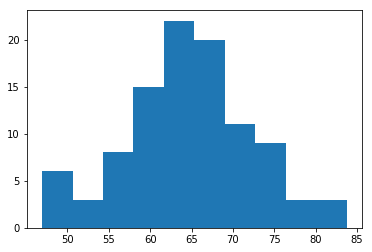

In [2]:
# plot original distribution
np.random.seed(10)
dist = np.random.normal(64,8,100)

pl.hist(dist)

In [3]:
# Generate N=100 samples from a Poisson Distribution, where each sample is size n=100
np.random.seed(1)

N = 100
n = 100

mean = 64

# for poisson distribution std is sqrt(mean)
std = np.sqrt(mean)

samples = [np.random.poisson(mean, size= n) for i in range(N)]

means = [np.mean(i) for i in samples]



(array([  2.,   3.,  10.,  20.,  14.,  17.,  14.,  12.,   4.,   4.]),
 array([ 47. ,  50.3,  53.6,  56.9,  60.2,  63.5,  66.8,  70.1,  73.4,
         76.7,  80. ]),
 <a list of 10 Patch objects>)

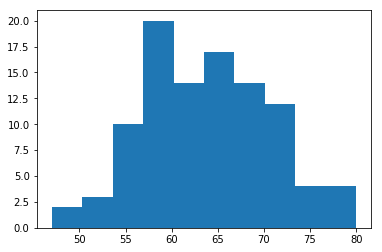

In [4]:
# plot a sample
pl.hist(samples[1])

Assess the validity of the Z-test: If the samples are drawn from the distribution you are testing the z-values you calculate should follow a N(0,1) distribution (a Gaussian with mean 0 and standard deviation 1). Show that the distribution of z -statistics (find the formula in a statistics book or in last week’s slides) that you calculated (one for each sample) is indeed consistent with N(0,1).

(array([  2.,   1.,  11.,  17.,  25.,  13.,  15.,  12.,   3.,   1.]),
 array([-2.675  , -2.12125, -1.5675 , -1.01375, -0.46   ,  0.09375,
         0.6475 ,  1.20125,  1.755  ,  2.30875,  2.8625 ]),
 <a list of 10 Patch objects>)

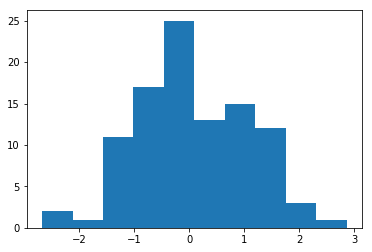

In [5]:
# calculate Z scores
Z_scores = [(mean - i) / (std / np.sqrt(N)) for i in means]

# Lets plot the Z score dist

pl.hist(Z_scores)

*** Fit the Z_scores to a Normal distribution***

Null Hypothesis: The distribution Z_scores comes from a normal distribution. Significance = 0.05


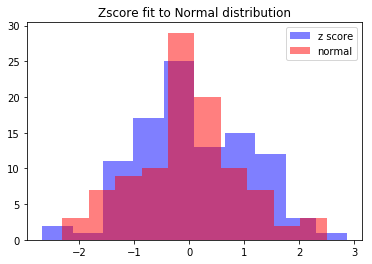

In [12]:

pl.hist(Z_scores, alpha = .5, color = 'blue', label = 'z score')
pl.hist(np.random.normal(0,1,100), alpha = .5, color = 'red', label = 'normal')
pl.title('Zscore fit to Normal distribution')
pl.legend(loc = 'best')

*** Assess Goodness of fit with KS and AD tests***

In [9]:
print "z-scores compared to normal: ", scipy.stats.kstest(Z_scores, 'norm')
print "z-scores compared to normal: ", scipy.stats.anderson(Z_scores, 'norm')


z-scores compared to normal:  KstestResult(statistic=0.069213047147490325, pvalue=0.73345801432065927)
z-scores compared to normal:  AndersonResult(statistic=0.3446322935297701, critical_values=array([ 0.555,  0.632,  0.759,  0.885,  1.053]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


*** Observations:
Based on the KS test, we are unable to reject the null hypothesis because the p-value 0.73 is greater then selected p-value (0.05), implying that the z-score distribution comes from a Normal distribution ***

***Based on the AD test, we are unable to reject the null hypothesis because the P-value of 0.759 is greater than the selected Pvalue 0.05 
This implies that the z-score distribution comes from a Normal distribution. ***